# Download market data

In [1]:
import yfinance as yf
import pandas as pd

tickers = ["AAPL", "MSFT", "GOOG", "META", "AMZN"]

data = pd.DataFrame()

for ticker in tickers:
    print(f"Downloading {ticker}...")
    df = yf.download(
        ticker,
        start="2024-01-01",
        end="2025-11-20",
        auto_adjust=True,   # makes life easier: prices already adjusted
        progress=False
    )

    # Use 'Close' (already adjusted) as our price series
    if "Close" not in df.columns:
        print(f"Warning: no 'Close' column for {ticker}, skipping.")
        continue

    data[ticker] = df["Close"]

data.head()


,AAPL,MSFT,GOOG,META,AMZN
Date,,,,,
2024-01-02,183.903244,365.421600,138.611420,344.168335,149.929993
2024-01-03,182.526230,365.155609,139.406021,342.359467,148.470001
2024-01-04,180.208130,362.534637,137.101776,344.993195,144.570007
2024-01-05,179.484955,362.347412,136.456192,349.793640,145.240005
2024-01-08,183.823975,369.185516,139.574860,356.462524,149.100006


# Compute daily returns

In [2]:
returns = data.pct_change().dropna()
returns.to_csv("../data/market_returns.csv")


# Analyze randomness

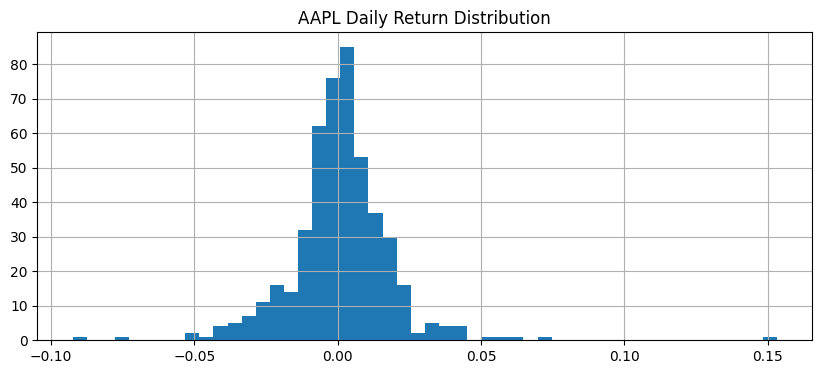

Mean: 0.0009603340225507088
Variance: 0.00032290444515531
Skew: 0.9804154462710456
Kurtosis: 13.326919443054672


In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,4))
returns["AAPL"].hist(bins=50)
plt.title("AAPL Daily Return Distribution")
plt.show()

print("Mean:", returns["AAPL"].mean())
print("Variance:", returns["AAPL"].var())
print("Skew:", returns["AAPL"].skew())
print("Kurtosis:", returns["AAPL"].kurt())


Observation:

kurtosis higher than 3 → Fat tails

Skewed left → asymmetric risk

# Compare normal vs real distribution

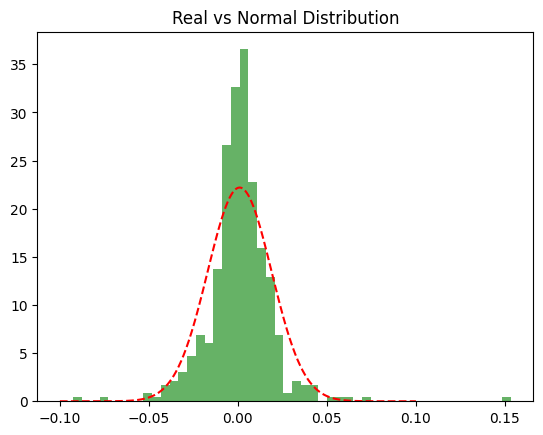

In [4]:
from scipy.stats import norm

mu, sigma = returns["AAPL"].mean(), returns["AAPL"].std()
x = np.linspace(-0.1, 0.1, 1000)
plt.hist(returns["AAPL"], bins=50, density=True, alpha=0.6, color="g")
plt.plot(x, norm.pdf(x, mu, sigma), "r--")
plt.title("Real vs Normal Distribution")
plt.show()


# Interpretations

Markets are not perfectly Gaussian — heavier tails → higher crash probability.